## Increasing sales of Digikala


The dataset that we intend to analyze in this project is related to the online store of Digikala. This dataset includes orders registered in this online store. Each order includes customer ID, order ID, item ID, order time, number of goods purchased and city.

In this project, we intend to understand the general behavior of customers by analyzing the data. In the following, according to the discovered patterns, we will make suggestions in order to increase the customer and sales of Digikala.


After the analysis, we see that:
- Most orders have 1 type of goods.
- Most customers only buy once.
- Most purchases were made in the ninth month of the year.

According to these cases, we present our suggestions at the end of this section.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [7]:
orders = pd.read_csv('orders.csv')
orders.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


### Data Cleaning



One of the steps in data cleaning is to fill in the null values. For this purpose, we check the dataset to find null values. As we can see, in this dataset, none of the columns have null values.

In [3]:
orders.isnull().sum()

ID_Order                 0
ID_Customer              0
ID_Item                  0
DateTime_CartFinalize    0
Amount_Gross_Order       0
city_name_fa             0
Quantity_item            0
dtype: int64

Another step in data cleaning is to remove duplicate values. So we examine the database to check for the presence or absence of duplicate data. It can be seen that this dataset does not have duplicate values.

In [5]:
orders.duplicated().sum()

0

Another task that can be done at this stage is to change the data type. For example, sometimes time and date are saved in object format. In these cases, we need to convert their type to date and time. Also, sometimes discrete data can be categorized into a categorical format.
For this purpose, we examine the data type of this dataset. As we can see, we need to change the data type of date.

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
ID_Order                 200000 non-null int64
ID_Customer              200000 non-null int64
ID_Item                  200000 non-null int64
DateTime_CartFinalize    200000 non-null object
Amount_Gross_Order       200000 non-null float64
city_name_fa             200000 non-null object
Quantity_item            200000 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB


To categorize data, we first examine the number of distinct values. Here we see that the number of distinct values for the city name is 906, which is a large number. As a result, we don't convert the type of it to a category.

In [18]:
orders['city_name_fa'].nunique()

906

In [11]:
orders['DateTime_CartFinalize'] = orders['DateTime_CartFinalize'].astype('datetime64[ns]')

Since we plan to measure sales in different months and years, as well as at different times of the day, we create a separate column in the dataset for each.

In [10]:
years = []
months = []
dayofmonths = []
dayofweeks = []
hours = []

for index in range(orders.shape[0]):
    years.append(orders['DateTime_CartFinalize'][index].year)
    months.append(orders['DateTime_CartFinalize'][index].month)
    dayofmonths.append(orders['DateTime_CartFinalize'][index].day)
    dayofweeks.append(orders['DateTime_CartFinalize'][index].dayofweek)
   
    if 0 <= orders['DateTime_CartFinalize'][index].hour < 6:
        hours.append('Midnight')
    
    elif 6 <= orders['DateTime_CartFinalize'][index].hour < 12:
        hours.append('Morning')
    
    elif 12 <= orders['DateTime_CartFinalize'][index].hour < 18:
        hours.append('Evening')
    
    else:
        hours.append('Night')
    
orders['Year'] = years
orders['Month'] = months
orders['DayOfMonth'] =  dayofmonths
orders['DayOfWeek'] = dayofweeks
orders['Hour'] = hours

Now we can delete the date column.

In [13]:
orders.drop('DateTime_CartFinalize' , axis = 1 , inplace= True)

Another step we need to take in data cleaning is to detect and correct out-of-range, inaccurate data.

In [36]:
orders.describe()

,ID_Order,ID_Customer,ID_Item,Amount_Gross_Order,Quantity_item
count,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,200000.000000
mean,9.871963e+06,2.860671e+06,3.757313e+05,1.458204e+06,1.261225
std,6.404275e+06,1.921815e+06,3.948462e+05,5.450972e+06,1.801186
min,1.000411e+06,4.661320e+05,7.600000e+01,0.000000e+00,1.000000
25%,5.022253e+06,1.021053e+06,8.955725e+04,1.212730e+05,1.000000
50%,8.591270e+06,2.895180e+06,2.302210e+05,3.211010e+05,1.000000
75%,1.246037e+07,4.179218e+06,5.192668e+05,1.011032e+06,1.000000
max,2.484656e+07,7.282118e+06,2.093722e+06,1.530000e+09,500.000000


As we can see, the largest value for the quantity column is 500. This seems illogical. So we extract the number of rows with this value for the quantity. As we can see, only 1 line has 500 for the quantity column. For a closer examination, we calculate the percentage of rows that have more than 100 for the quantity column.

In [7]:
orders[orders['Quantity_item'] == 500]

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
168594,4152468,586941,143130,2016-06-02 14:44:24.000,15000.0,یزد,500.0


As we can see, a very small percentage of rows have this feature. It looks like they can be outlier considered. So we remove these rows from our table.

In [16]:
(len(orders[orders['Quantity_item'] >= 100]) / orders.shape[0] ) * 100

0.002

In [12]:
index_of_outliers = orders[orders['Quantity_item'] >= 100].index
orders.drop(index_of_outliers , axis=0 , inplace=True)

In [5]:
orders.describe(include = 'O')

,city_name_fa
count,199996
unique,906
top,تهران
freq,108303


The " Amount_Gross_Order " column is unclear. As a result, it is not useful for analysis, so we can delete this column.

In [9]:
orders.drop('Amount_Gross_Order' , axis = 1, inplace=True)

To check whether the order ID column has value and importance for analysis, we check the existence of duplicate values in this column.
As we can see, this column has a duplicate value. By check one of these values we find that in fact, the duplicate values for this row are for different items in an order. So, we can use this column in our analysis.

In [71]:
orders[orders['ID_Order'].duplicated()]

,ID_Order,ID_Customer,ID_Item,city_name_fa,Quantity_item,Year,Month,DayOfMonth,DayOfWeek,Hour
3536,13121463,3020900,911772,تهران,1.0,2018,5,25,4,Evening
4689,1796825,897205,45608,دزفول,1.0,2015,2,28,5,Evening
5093,6731877,3516504,178276,تهران,1.0,2017,3,12,6,Night
5869,3257236,493312,103702,یاسوج,1.0,2016,1,20,2,Evening
6362,10120426,3166197,161806,تهران,2.0,2017,12,20,2,Evening
8938,6379478,721039,30236,تهران,1.0,2017,2,13,0,Night
9638,5845408,3094047,247500,تهران,1.0,2016,12,22,3,Evening
11666,6123047,1345233,33740,کرج,1.0,2017,1,20,4,Evening
13336,10229111,1266317,437811,کرج,1.0,2017,12,21,3,Night
13750,4427819,3350113,139283,مشهد,1.0,2016,7,10,6,Midnight


In [14]:
orders[orders['ID_Order'] == 13121463]

,ID_Order,ID_Customer,ID_Item,city_name_fa,Quantity_item,Year,Month,DayOfMonth,DayOfWeek,Hour
2919,13121463,3020900,949501,تهران,1.0,2018,5,25,4,Evening
3536,13121463,3020900,911772,تهران,1.0,2018,5,25,4,Evening


In [16]:
orders.head()

,ID_Order,ID_Customer,ID_Item,city_name_fa,Quantity_item,Year,Month,DayOfMonth,DayOfWeek,Hour
0,2714054,469662,21386,محمود آباد,1.0,2015,10,15,3,Morning
1,11104039,3063877,248497,خرمدره,1.0,2018,2,11,6,Midnight
2,4228130,3184893,50144,قرچک,1.0,2016,6,14,1,Midnight
3,22225624,6888562,70208,قم,1.0,2018,9,3,0,Evening
4,4068771,2533490,67627,تهران,1.0,2016,5,21,5,Morning


### Data Visualization 

In this section, we want to get the number of items in the orders and show them in the chart. As we can see, the number of available items is 3, 2, or 1. As a result, we create a dictionary that categorizes the number of orders according to the number of items in them. By doing this, we want to understand how many goods are usually ordered in each order.

In [17]:
multi_item_orders = orders[orders['ID_Order'].duplicated()]['ID_Order'].value_counts()
number_of_item_in_order = {1:0 , 2:0 , 3:0}

for index in range(0,len(orders[orders['ID_Order'].duplicated()]['ID_Order'].value_counts())):
   
    if (multi_item_orders.values[index] == 3):
        number_of_item_in_order[3] += 1
    elif (multi_item_orders.values[index] == 2):
        number_of_item_in_order[2] += 1
    elif (multi_item_orders.values[index] == 1):
        number_of_item_in_order[1] += 1


number_of_item_in_order

{1: 2275, 2: 41, 3: 4}

As we can see, in most orders, there is only one type of product. It is rare for multiple products to be ordered in one order.

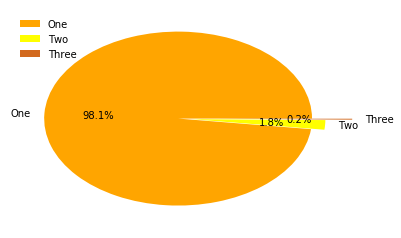

In [62]:
number_or_items = list(number_of_item_in_order.values())
colors = ['orange' , 'yellow' , 'chocolate']
labels = ['One' , 'Two' , 'Three']

plt.pie(number_or_items , labels=labels , colors=colors , autopct='%1.1f%%' , explode=[0,0.1,0.3])
plt.legend(loc = 'upper left' , edgecolor = 'None' , facecolor = 'None')
plt.show()

In this section, we want to check how many times users buy from this store. Due to the large dispersion of data, we divided the chart into three parts.
As we can see, many users bought only once. And a smaller percentage of customers made frequent purchases. It seems that we need to take measures to increase customers' desire for future purchases.

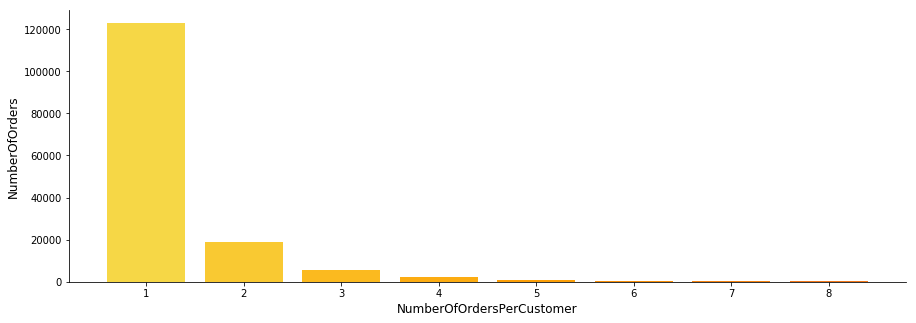

In [204]:
fig, ax = plt.subplots(figsize = (15,5))

groupby_customers = orders.groupby('ID_Customer').agg('size')
order_and_items = pd.Series(groupby_customers.values).value_counts()

number_of_item_in_order = order_and_items.index #x axis
sum_of_orders = order_and_items.values        #y axis

my_color = cm.inferno(np.linspace(0.9 , 0.7 , len(number_of_item_in_order[:8])))

plt.bar(number_of_item_in_order[:8] , sum_of_orders[:8] ,color = my_color )

plt.xlabel('NumberOfOrdersPerCustomer' , fontsize = 12)
plt.ylabel('NumberOfOrders' , fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

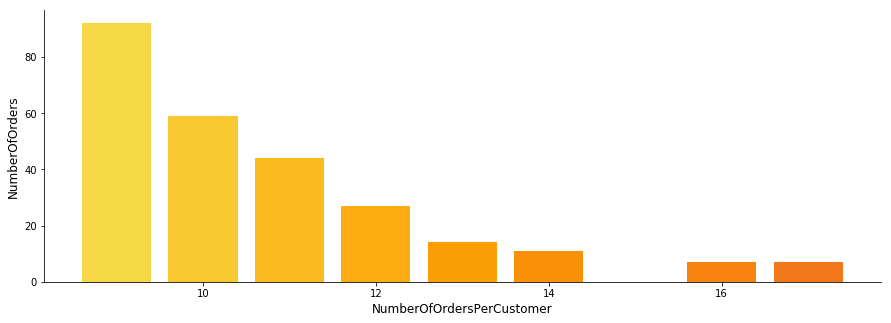

In [208]:
fig, ax = plt.subplots(figsize = (15,5))

my_color = cm.inferno(np.linspace(0.9 , 0.7 , len(number_of_item_in_order[8:16])))

plt.bar(number_of_item_in_order[8:16] , sum_of_orders[8:16] , color = my_color)

plt.xlabel('NumberOfOrdersPerCustomer' , fontsize = 12)
plt.ylabel('NumberOfOrders' , fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

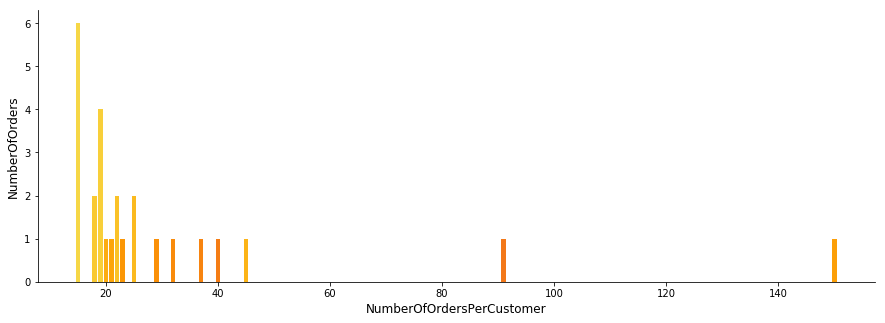

In [210]:
fig, ax = plt.subplots(figsize = (15,5))

my_color = cm.inferno(np.linspace(0.9 , 0.7 , len(number_of_item_in_order[16:])))

plt.bar(number_of_item_in_order[16:] , sum_of_orders[16:] , color = my_color)

plt.xlabel('NumberOfOrdersPerCustomer' , fontsize = 12)
plt.ylabel('NumberOfOrders' , fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

To check the best-selling goods, we calculate the number of distinct quantities for the goods. As we can see, there are about 9,000 different products in this database. Showing this amount of data on a chart does not convey comprehensible information to us. Therefore, we only examine the best-selling goods.

In [40]:
orders['ID_Item'].nunique()

95232

In [17]:
groupby_items = orders.groupby('ID_Item').agg('size')  #grouped orders based on items
number_item_sell = pd.DataFrame()
number_item_sell['ID_Item'] = groupby_items.index
number_item_sell['Number_Of_Orders'] = groupby_items.values

top_sell_items = number_item_sell.nlargest(10,columns='Number_Of_Orders') #10 most seller items

As we can see, the best-selling goods have been sold between 150 and 500 times. Upon further examination, we see that only about 2% of the goods sold sell more than 10 items.

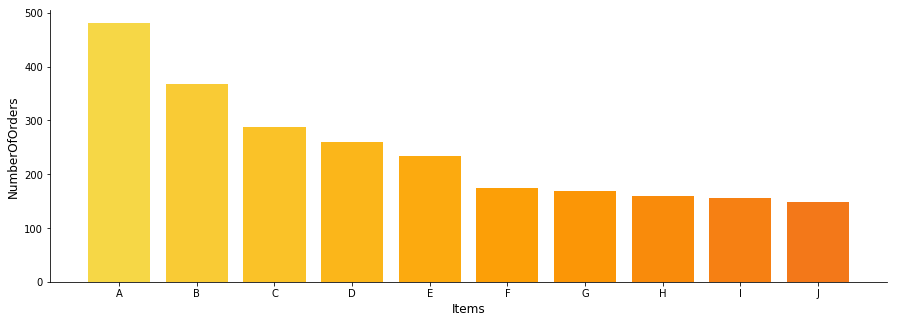

In [36]:
fig, ax = plt.subplots(figsize = (15,5))

my_color = cm.inferno(np.linspace(0.9 , 0.7 , len(top_sell_items['Number_Of_Orders'])))

item_id = ['A' , 'B' , 'C' , 'D' , 'E' , 'F' , 'G' , 'H' , 'I' , 'J'] #set name for items
plt.bar(item_id , top_sell_items['Number_Of_Orders'] , color = my_color)

plt.xlabel('Items' , fontsize = 12)
plt.ylabel('NumberOfOrders' , fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [18]:
number_item_sell[number_item_sell['Number_Of_Orders'] > 10].shape

(2075, 2)

In [19]:
(2075/number_item_sell.shape[0]) * 100

2.1789123289685084

In the previous section, we examined the items in terms of their presence in the number of orders. In this section, we reviewed the items according to the number purchased. As we can see, a product that has a large number of orders is not a member of the top 10 products sold.

In [23]:
groupby_item_qt = orders.groupby('ID_Item')['Quantity_item'].agg('sum')  #grouped orders based on city
item_qt = pd.DataFrame()
item_qt['ID_Item'] = groupby_item_qt.index
item_qt['Quantity_item'] = groupby_item_qt.values

top_qt_item = item_qt.nlargest(10,columns='Quantity_item') #10 most city

In [24]:
top_qt_item 

,ID_Item,Quantity_item
42534,294942,553.0
24409,143130,496.0
5676,36871,463.0
8947,51778,348.0
37287,245223,344.0
7613,45121,322.0
51601,416448,307.0
35362,230209,301.0
712,8289,282.0
24563,144918,244.0


In [27]:
top_sell_items

,ID_Item,Number_Sell
42534,294942,481
5676,36871,367
8947,51778,288
7613,45121,259
712,8289,233
51601,416448,175
2217,19890,168
2948,22839,160
42535,294943,155
25600,153067,149


To see which cities this store has the most customers, we calculate the number of registered orders for each city. The cities of Tehran, Mashhad, Isfahan are the best-selling cities. And in fact, the largest number of orders has been registered in them.

In [15]:
groupby_citys = orders.groupby('city_name_fa').agg('size')  #grouped orders based on city
customer_city = pd.DataFrame()
customer_city['City_Name'] = groupby_citys.index
customer_city['Number_City'] = groupby_citys.values

top_sell_city = customer_city.nlargest(10,columns='Number_City') #10 most city

In [16]:
customer_city.nlargest(10,columns='Number_City')

,City_Name,Number_City
215,تهران,108303
654,مشهد,6024
76,اصفهان,5992
815,کرج,5934
97,اهواز,4313
505,شیراز,4065
355,رشت,3204
202,تبریز,2630
593,قم,2388
818,کرمانشاه,2248


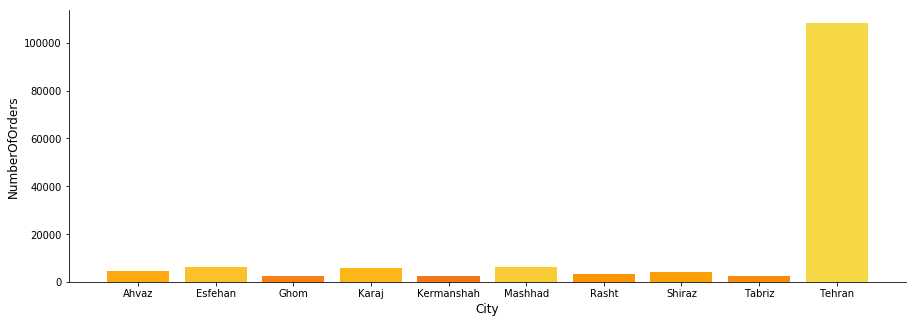

In [19]:
fig, ax = plt.subplots(figsize = (15,5))

my_color = cm.inferno(np.linspace(0.9 , 0.7 , len(top_sell_city['Number_City'])))

citys = ['Tehran' , 'Mashhad' , 'Esfehan' , 'Karaj' , 'Ahvaz' , 'Shiraz' , 'Rasht' , 'Tabriz' , 'Ghom' , 'Kermanshah']
plt.bar(citys , top_sell_city['Number_City'] , color = my_color)


plt.xlabel('City' , fontsize = 12)
plt.ylabel('NumberOfOrders' , fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

To see if the cities with the highest number of orders and the number of goods purchased are more, we calculate the total number of goods purchased in each city. As we can see, the order of cities has not changed. As a result, the chart for the number of goods sold in each city is the same as the above chart.

In [20]:
groupby_citys_qt = orders.groupby('city_name_fa')['Quantity_item'].agg(['sum'])  #grouped orders based on city
customer_city_qt = pd.DataFrame()
customer_city_qt['City_Name'] = groupby_citys_qt.index
customer_city_qt['Quantity_item'] = groupby_citys_qt.values

top_qt_city = customer_city_qt.nlargest(10,columns='Quantity_item') #10 most city

In [21]:
top_sell_city

,City_Name,Number_City
215,تهران,108303
654,مشهد,6024
76,اصفهان,5992
815,کرج,5934
97,اهواز,4313
505,شیراز,4065
355,رشت,3204
202,تبریز,2630
593,قم,2388
818,کرمانشاه,2248


In [22]:
top_qt_city

,City_Name,Quantity_item
215,تهران,136138.0
654,مشهد,7698.0
76,اصفهان,7552.0
815,کرج,7144.0
97,اهواز,5559.0
505,شیراز,4923.0
355,رشت,4086.0
202,تبریز,3512.0
593,قم,3051.0
818,کرمانشاه,2929.0


We want to see how the number of items purchased has changed over time. The number of goods purchased has increased over time, which means that more people were willing to buy from this online store.

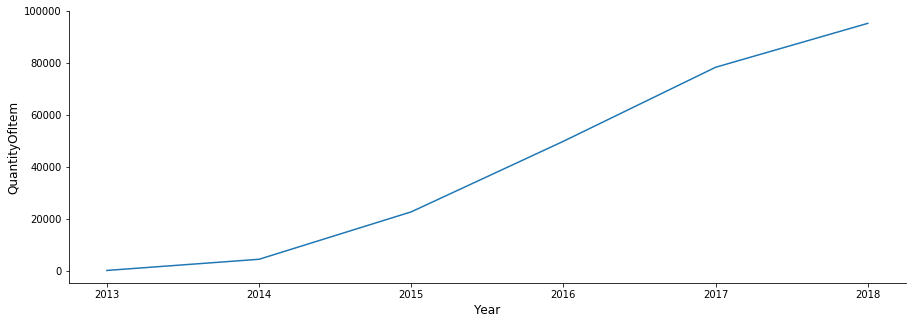

In [34]:
groupby_year_qt = orders.groupby('Year')['Quantity_item'].agg(['sum'])  #grouped orders based on year
order_year_qt = pd.DataFrame()
order_year_qt['Year'] = groupby_year_qt.index
order_year_qt['Quantity_item'] = groupby_year_qt.values

fig, ax = plt.subplots(figsize = (15,5))

plt.plot(order_year_qt['Year'], order_year_qt['Quantity_item'] )


plt.xlabel('Year' , fontsize = 12)
plt.ylabel('QuantityOfItem' , fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

To see which month of the year has the most sales, we group the purchases according to the month of purchase. As is known, the highest amount of purchases has been recorded in 9 months onwards. In the first 6 months of the year, month 3 has the most orders and in the second 6 months, month 9 has the most purchases. We know that Esfand is the 3rd month when people buy different goods to start the new year. Month 9 is the beginning of a new school year. Given this amount of purchases, it seems that a large number of these purchases are related to educational equipment and teaching aids.

- Draw it separately for different years and see how it goes

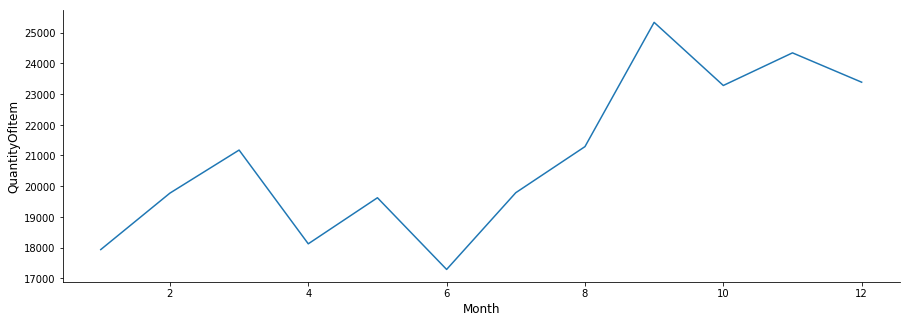

In [36]:
groupby_year_qt = orders.groupby('Month')['Quantity_item'].agg(['sum'])  #grouped orders based on year
order_year_qt = pd.DataFrame()
order_year_qt['Month'] = groupby_year_qt.index
order_year_qt['Quantity_item'] = groupby_year_qt.values

fig, ax = plt.subplots(figsize = (15,5))

plt.plot(order_year_qt['Month'], order_year_qt['Quantity_item'] )


plt.xlabel('Month' , fontsize = 12)
plt.ylabel('QuantityOfItem' , fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [35]:
orders.head()

,ID_Order,ID_Customer,ID_Item,city_name_fa,Quantity_item,Year,Month,DayOfMonth,DayOfWeek,Hour
0,2714054,469662,21386,محمود آباد,1.0,2015,10,15,3,Morning
1,11104039,3063877,248497,خرمدره,1.0,2018,2,11,6,Midnight
2,4228130,3184893,50144,قرچک,1.0,2016,6,14,1,Midnight
3,22225624,6888562,70208,قم,1.0,2018,9,3,0,Evening
4,4068771,2533490,67627,تهران,1.0,2016,5,21,5,Morning


We want to see which days of the month we have the most purchases, we see that the 19th to the 21st of each month we have the most purchases.

- Now let's draw each month separately to see if it makes a difference

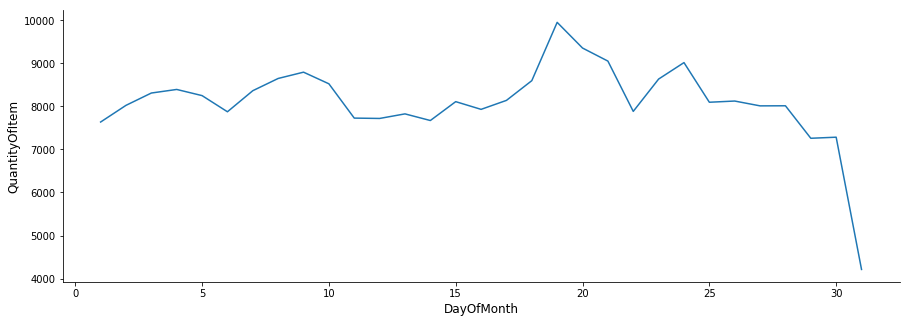

In [38]:
groupby_DayOfMonth_qt = orders.groupby('DayOfMonth')['Quantity_item'].agg(['sum'])  #grouped orders based on year
order_DayOfMonth_qt = pd.DataFrame()
order_DayOfMonth_qt['DayOfMonth'] = groupby_DayOfMonth_qt.index
order_DayOfMonth_qt['Quantity_item'] = groupby_DayOfMonth_qt.values

fig, ax = plt.subplots(figsize = (15,5))

plt.plot(order_DayOfMonth_qt['DayOfMonth'], order_DayOfMonth_qt['Quantity_item'] )


plt.xlabel('DayOfMonth' , fontsize = 12)
plt.ylabel('QuantityOfItem' , fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [39]:
order_DayOfMonth_qt.nlargest(3,columns='Quantity_item')

,DayOfMonth,Quantity_item
18,19,9947.0
19,20,9351.0
20,21,9048.0


The first days of the week have more purchases. It may be due to the type of delivery of the goods. To increase sales, they can make changes in the type of delivery of goods on weekends.

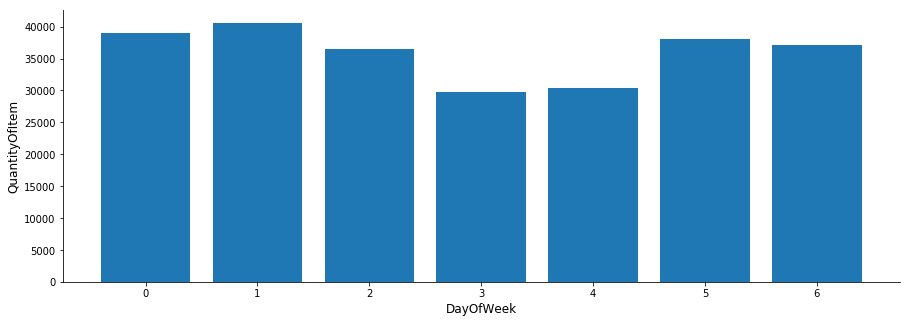

In [43]:
groupby_DayOfMonth_qt = orders.groupby('DayOfWeek')['Quantity_item'].agg(['sum'])  #grouped orders based on year
order_DayOfMonth_qt = pd.DataFrame()
order_DayOfMonth_qt['DayOfWeek'] = groupby_DayOfMonth_qt.index
order_DayOfMonth_qt['Quantity_item'] = groupby_DayOfMonth_qt.values

fig, ax = plt.subplots(figsize = (15,5))

plt.bar(order_DayOfMonth_qt['DayOfWeek'], order_DayOfMonth_qt['Quantity_item'] )


plt.xlabel('DayOfWeek' , fontsize = 12)
plt.ylabel('QuantityOfItem' , fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

During the day, evening, and night, the largest number of purchases was made.

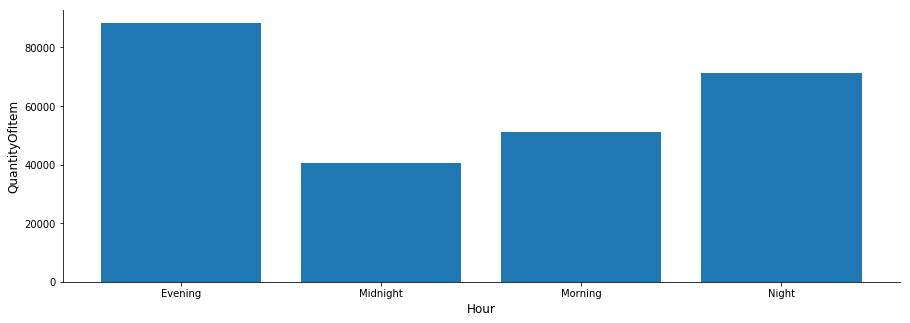

In [42]:
groupby_DayOfMonth_qt = orders.groupby('Hour')['Quantity_item'].agg(['sum'])  #grouped orders based on year
order_DayOfMonth_qt = pd.DataFrame()
order_DayOfMonth_qt['Hour'] = groupby_DayOfMonth_qt.index
order_DayOfMonth_qt['Quantity_item'] = groupby_DayOfMonth_qt.values

fig, ax = plt.subplots(figsize = (15,5))

plt.bar(order_DayOfMonth_qt['Hour'], order_DayOfMonth_qt['Quantity_item'] )


plt.xlabel('Hour' , fontsize = 12)
plt.ylabel('QuantityOfItem' , fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

We obtained some patterns through analysis. Now, using these patterns, we intend to make suggestions to increase the sales of Digikala.

- As we have seen, most orders included only one type of product. In order to increase sales, it is necessary to use strategies to encourage customers to buy several types of goods in one order. For example:

    - Using an efficient recommender system to offer the best product to the customers and encourage them to buy.

    - The best-selling goods seem to be among the essential goods of life. Apart from the goods purchased by the customer, several best-selling goods can also be offered to him. Because considering that this product is one of the essential needs, the customer may be encouraged to buy this product as well.

    - Allocate 5% discount for every three purchases and 10% discount for every five purchases.

- Another observation was that most customers bought once. As a result, we need to encourage customers to buy from this store again.

    - It is possible to consider points for subsequent purchases that the collected points can cause a discount or a certain amount of credit as a gift.

    - At the end of the purchase, we can ask the customer what makes them buy from this store again. As soon as the customer feels important, they will want to buy in the future. On the other hand, the suggestions made by the customers themselves can also be used.

- As we saw, the least number of purchases was made in June. Special discounts at the end of the season can be considered to increase purchases this month.

- The number of customers may increase by minimizing the delivery time. Because many times people need goods that they need to use that day.
